In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv('../data/sucio/rii_d_cant_focos_calor_prov_2015_2024.csv', sep=';', quotechar='"')
df.head()

,jurisdicción,año,total,enero,febrero,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre
0,Buenos Aires,2015,8267,787,543,913,836,455,758,824,463,1062,441,513,672
1,Catamarca,2015,722,6,4,3,5,18,24,46,83,173,274,44,42
2,Chaco,2015,10698,140,169,574,178,105,402,1211,1833,3996,1519,261,310
3,Chubut,2015,6293,169,3963,1870,24,11,13,9,17,10,64,127,16
4,CABA,2015,3,0,0,0,0,0,1,0,0,1,0,1,0


In [65]:
df.shape

(240, 15)

In [66]:
df.columns

Index(['jurisdicción', 'año', 'total', 'enero', 'febrero', 'marzo', 'abril',
       'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre',
       'noviembre', 'diciembre'],
      dtype='object')

In [67]:
df = df.replace(' ', 0)
df = df.fillna(0)

In [68]:
numeric_cols = df.columns[2:]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')



In [69]:
df.dtypes

jurisdicción    object
año              int64
total            int64
enero            int64
febrero          int64
marzo            int64
abril            int64
mayo             int64
junio            int64
julio            int64
agosto           int64
septiembre       int64
octubre          int64
noviembre        int64
diciembre        int64
dtype: object

In [70]:
df.isnull().sum()

jurisdicción    0
año             0
total           0
enero           0
febrero         0
marzo           0
abril           0
mayo            0
junio           0
julio           0
agosto          0
septiembre      0
octubre         0
noviembre       0
diciembre       0
dtype: int64

In [71]:
df.head()

,jurisdicción,año,total,enero,febrero,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre
0,Buenos Aires,2015,8267,787,543,913,836,455,758,824,463,1062,441,513,672
1,Catamarca,2015,722,6,4,3,5,18,24,46,83,173,274,44,42
2,Chaco,2015,10698,140,169,574,178,105,402,1211,1833,3996,1519,261,310
3,Chubut,2015,6293,169,3963,1870,24,11,13,9,17,10,64,127,16
4,CABA,2015,3,0,0,0,0,0,1,0,0,1,0,1,0


In [77]:

df = df.drop('total', axis=1)

In [78]:
# Filtrar por rango de años
df_filtrado = df[df['año'].between(2017, 2024)].copy()


In [79]:
df.to_csv("../data/limpio/c_focos_prov_mes.csv", index=False)

In [93]:
df.head()

,jurisdicción,año,enero,febrero,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre
0,Buenos Aires,2015,787,543,913,836,455,758,824,463,1062,441,513,672
1,Catamarca,2015,6,4,3,5,18,24,46,83,173,274,44,42
2,Chaco,2015,140,169,574,178,105,402,1211,1833,3996,1519,261,310
3,Chubut,2015,169,3963,1870,24,11,13,9,17,10,64,127,16
4,CABA,2015,0,0,0,0,0,1,0,0,1,0,1,0


In [94]:
print(len(df.columns))
print(df.columns)


14
Index(['jurisdicción', 'año', 'enero', 'febrero', 'marzo', 'abril', 'mayo',
       'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre',
       'diciembre'],
      dtype='object')


In [95]:
df.columns = ['Jurisdicción', 'Año', 'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']


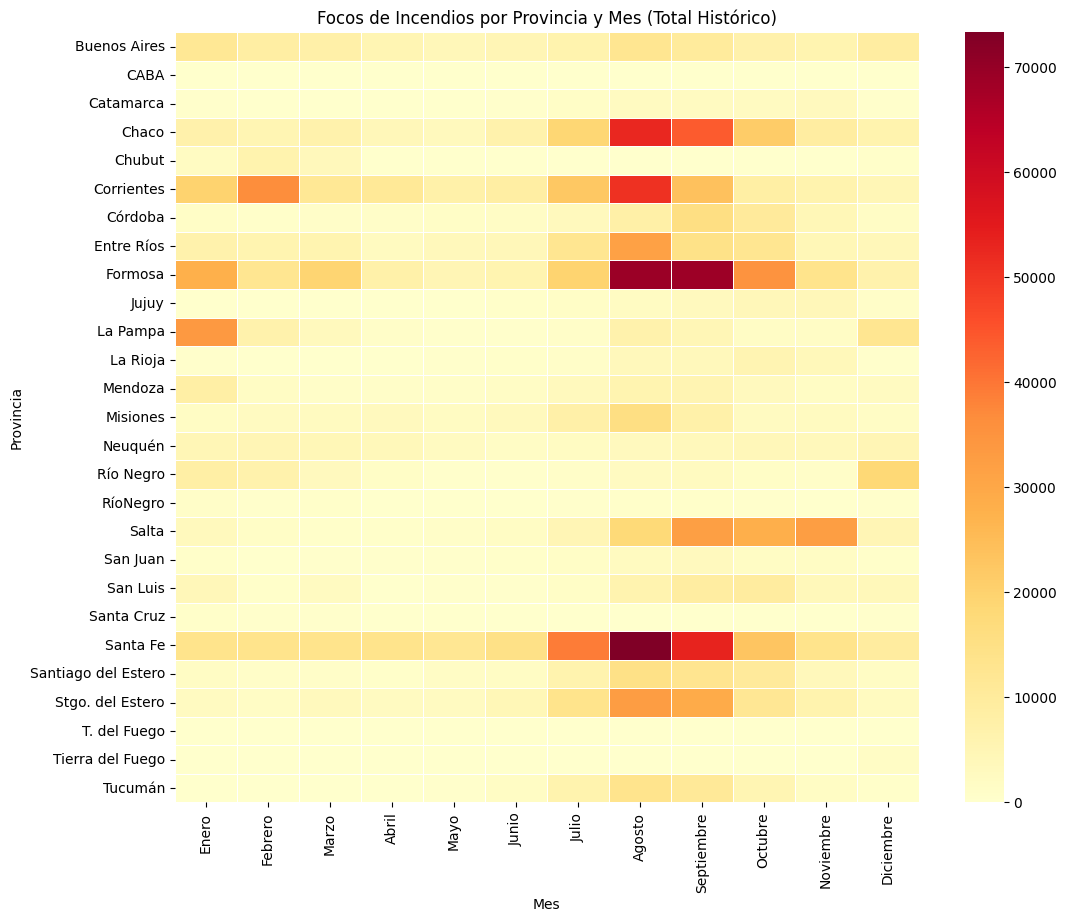

In [103]:
df_meses = df.melt(id_vars=['Jurisdicción', 'Año'], var_name='mes', value_name='focos')

# Agrupar por provincia y mes (suma histórica)
heatmap_data = df_meses.groupby(['Jurisdicción', 'mes'])['focos'].sum().unstack()

# Ordenar meses cronológicamente
meses_orden = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
heatmap_data = heatmap_data[meses_orden]

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=False, fmt="d", linewidths=0.5)
plt.title("Focos de Incendios por Provincia y Mes (Total Histórico)")
plt.xlabel("Mes")
plt.ylabel("Provincia")
plt.savefig("../web/src/assets/c_focos_prov_mes.svg", bbox_inches='tight')
plt.show()
